First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

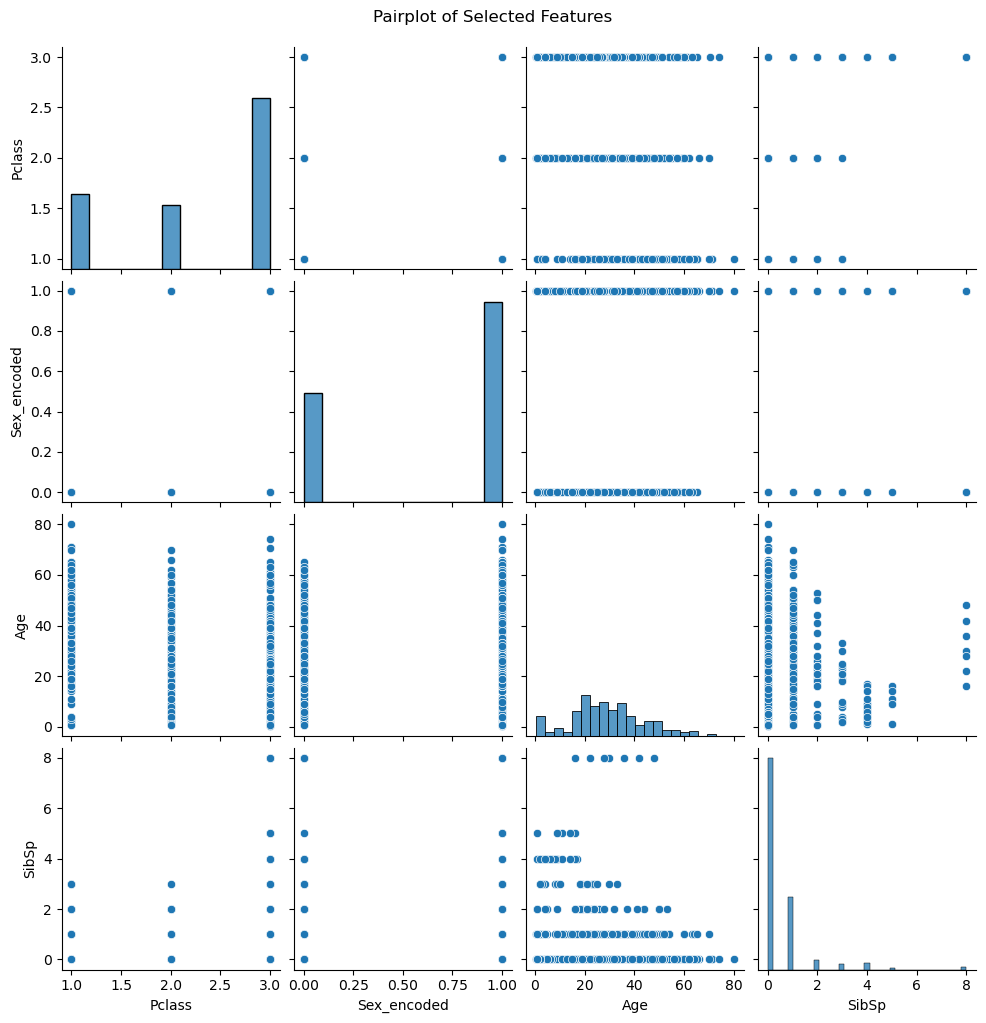

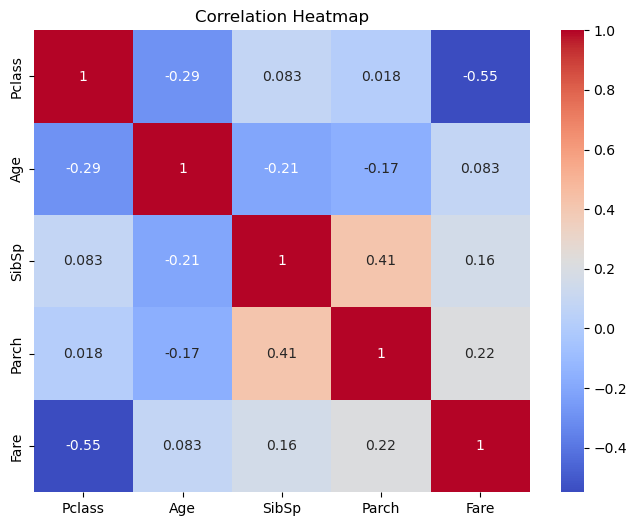

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load Titanic dataset with 'Cabin' column
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# 2. Explore and Understand the Dataset
print("First 5 rows:")
print(titanic.head())

print("\nInfo about columns:")
print(titanic.info())

print("\nMissing values count:")
print(titanic.isnull().sum())

# 3. Forward fill and backward fill on 'Age'
titanic['Age'] = titanic['Age'].fillna(method='ffill').fillna(method='bfill')

# 4. Fill missing values in 'Cabin' with "unknown"
titanic['Cabin'] = titanic['Cabin'].fillna('unknown')
print("\nUnique Cabin values (limited to 5):")
print(titanic['Cabin'].unique()[:5])

# 5. Remove duplicate records
titanic.drop_duplicates(inplace=True)

# 6. Encode Categorical Column 'Sex' using LabelEncoder
le = LabelEncoder()
titanic['Sex_encoded'] = le.fit_transform(titanic['Sex'])

# 7. Scale Numerical Feature 'Fare' using StandardScaler
scaler = StandardScaler()
titanic['Fare_scaled'] = scaler.fit_transform(titanic[['Fare']])

# 8. Pair plot of selected features: 'Pclass', 'Sex_encoded', 'Age', 'SibSp'
sns.pairplot(titanic[['Pclass', 'Sex_encoded', 'Age', 'SibSp']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# 9. Correlation Heatmap for 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'
corr_features = titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
corr = corr_features.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()